<a href="https://colab.research.google.com/github/farrelrassya/teachingMLDL/blob/main/01.%20Machine%20Learning/02.%20Week%202/Notebook/01_Linear_Regression_for_Nonlinear_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Linear Regression for Nonlinear Data: Using Basis Functions to Bridge the Gap


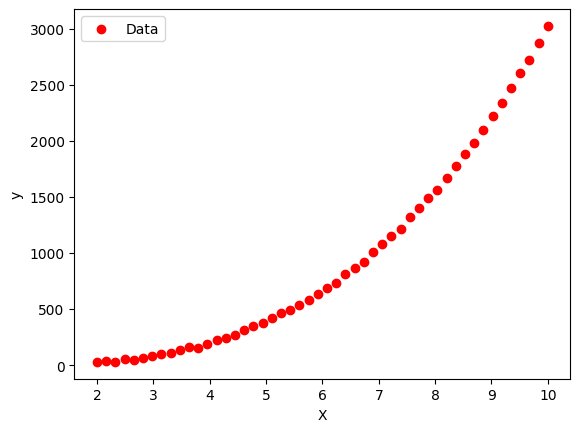

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(2, 10, 50).reshape(-1, 1)
y = 3 * X**3 + 2 * X + 1 + np.random.randn(50, 1) * 10

plt.scatter(X, y, color='red', label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

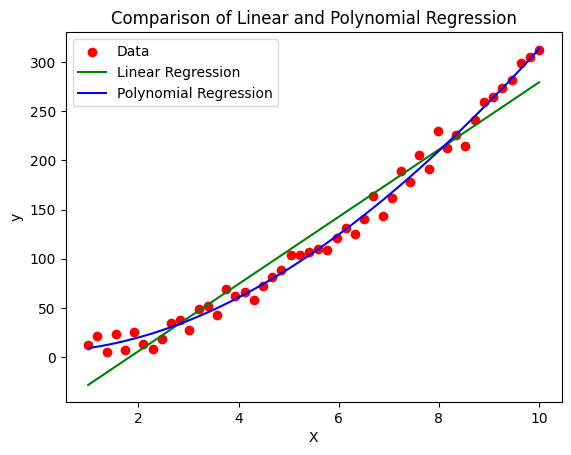

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


X = np.linspace(1, 10, 50).reshape(-1, 1)
y = 3 * X**2 + 2 * X + 1 + np.random.randn(50, 1) * 10


linear_model = LinearRegression()
linear_model.fit(X, y)


y_pred_linear = linear_model.predict(X)


poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)


X_test = np.linspace(1, 10, 100).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
y_pred_poly = poly_model.predict(X_test_poly)


plt.scatter(X, y, color='red', label='Data')
plt.plot(X_test, linear_model.predict(X_test), color='green', label='Linear Regression')
plt.plot(X_test, y_pred_poly, color='blue', label='Polynomial Regression')
plt.title('Comparison of Linear and Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- $\text{MSE}$: Mean Squared Error, a metric that calculates the average of the squared differences between actual and predicted values.

- $n$: The total number of observations or data points in the dataset.

- $\sum_{i=1}^{n}$: Summation over all data points from $i = 1$ to $n$.

- $y_i$: The actual value for the $i$-th observation.

- $\hat{y}_i$: The predicted value for the $i$-th observation, generated by the model.

- $(y_i - \hat{y}_i)^2$: The squared difference between the actual value $y_i$ and the predicted value $\hat{y}_i$.



Mean Absolute Error (MAE) Formula
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

- $\text{MAE}$: Mean Absolute Error, a metric that calculates the average of the absolute differences between actual and predicted values.

- $n$: The total number of observations or data points in the dataset.

- $\sum_{i=1}^{n}$: Summation over all data points from $i = 1$ to $n$.

- $y_i$: The actual value for the $i$-th observation.

- $\hat{y}_i$: The predicted value for the $i$-th observation, generated by the model.

- $|y_i - \hat{y}_i|$: The absolute difference between the actual value $y_i$ and the predicted value $\hat{y}_i$.


In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_linear = mean_squared_error(y, y_pred_linear)
mse_poly = mean_squared_error(y, poly_model.predict(X_poly))
print(f"Mean Squared Error for Linear Regression: {mse_linear:.2f}")
print(f"Mean Squared Error for Polynomial Regression (degree 3): {mse_poly:.2f}")

Mean Squared Error for Linear Regression: 364.32
Mean Squared Error for Polynomial Regression (degree 3): 76.27


In [4]:
mae_linear = mean_absolute_error(y, y_pred_linear)
mae_poly = mean_absolute_error(y, poly_model.predict(X_poly))
print(f"Mean Squared Error for Linear Regression: {mae_linear:.2f}")
print(f"Mean Squared Error for Polynomial Regression (degree 3): {mae_poly:.2f}")

Mean Squared Error for Linear Regression: 16.01
Mean Squared Error for Polynomial Regression (degree 3): 7.06


Gaussian Basis Function
$$
\phi(x) = \exp\left( -\frac{(x - \mu)^2}{2s^2} \right)
$$

- $\phi(x)$: The value of the Gaussian basis function at input $x$.

- $x$: The input data point or independent variable.

- $\mu$: The mean or center of the Gaussian function, determining where the peak occurs.

- $s$: The standard deviation (spread) of the Gaussian function, controlling the width of the curve.

- $\exp$: The exponential function $e^{\,\cdot\,}$.

- $-\frac{(x - \mu)^2}{2s^2}$: The exponent in the exponential function, representing the negative squared distance between $x$ and $\mu$, normalized by $2s^2$.


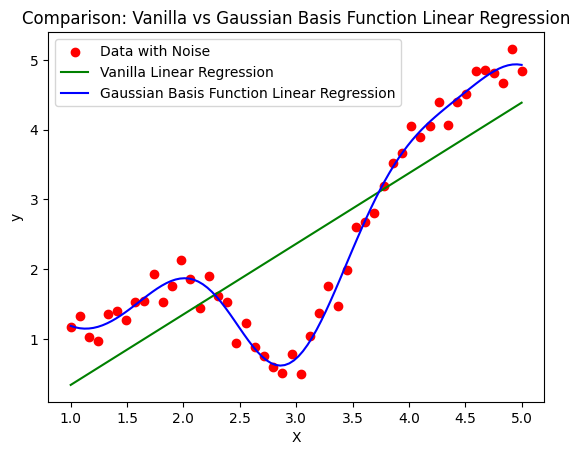

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Gaussian Basis Function
def gaussian_basis(x, mu, s):
    return np.exp(-(x - mu)**2 / (2 * s**2))


X = np.linspace(1, 5, 50).reshape(-1, 1)
y = np.array([1, 2, 0.5, 4, 5])
y = np.interp(X.flatten(), np.array([1, 2, 3, 4, 5]), y) + np.random.randn(50) * 0.2


vanilla_model = LinearRegression()
vanilla_model.fit(X, y)

#Gaussian Basis Function Linear Regression
mu = np.linspace(1, 5, 10)  # center points for the Gaussian functions
s = 0.5  # width of the Gaussian functions

X_gauss = np.hstack([gaussian_basis(X, m, s) for m in mu])
gaussian_model = LinearRegression()
gaussian_model.fit(X_gauss, y)


X_test = np.linspace(1, 5, 100).reshape(-1, 1)


y_pred_vanilla = vanilla_model.predict(X_test)


X_test_gauss = np.hstack([gaussian_basis(X_test, m, s) for m in mu])
y_pred_gauss = gaussian_model.predict(X_test_gauss)


plt.scatter(X, y, color='red', label='Data with Noise')
plt.plot(X_test, y_pred_vanilla, color='green', label='Vanilla Linear Regression')
plt.plot(X_test, y_pred_gauss, color='blue', label='Gaussian Basis Function Linear Regression')
plt.title('Comparison: Vanilla vs Gaussian Basis Function Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [6]:
mse_linear = mean_squared_error(y, vanilla_model.predict(X))
mse_gauss = mean_squared_error(y, gaussian_model.predict(X_gauss))
print(f"Mean Squared Error for Linear Regression: {mse_linear:}")
print(f"Mean Squared Error for Gaussian Basis Function Linear Regression: {mse_gauss:.3f}")

Mean Squared Error for Linear Regression: 0.674038699763935
Mean Squared Error for Gaussian Basis Function Linear Regression: 0.027


Sigmoidal Basis Function
$$
\phi(x) = \frac{1}{1 + \exp\left( -\frac{x - \mu}{s} \right)}
$$

- $\phi(x)$: The value of the sigmoidal basis function at input $x$.

- $x$: The input data point or independent variable.

- $\mu$: The mean or center of the sigmoid function, determining the midpoint of the transition.

- $s$: The scaling parameter of the sigmoid function, controlling the steepness of the curve.

- $\exp$: The exponential function $e^{\,\cdot\,}$.

- $-\frac{x - \mu}{s}$: The exponent in the exponential function, representing the scaled difference between $x$ and $\mu$ divided by $s$.


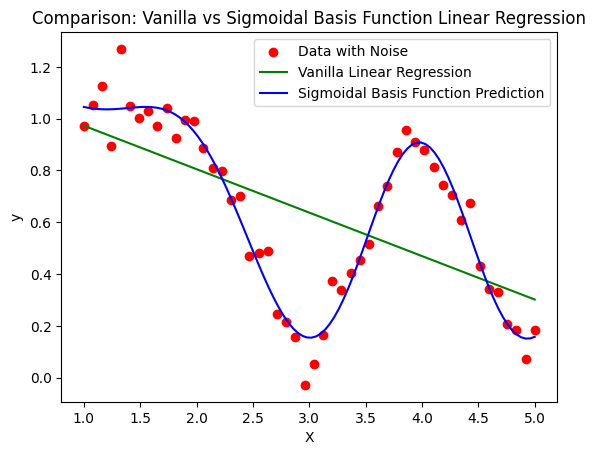

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


def sigmoid_basis(x, mu, s):
    return 1 / (1 + np.exp(-(x - mu) / s))


X = np.linspace(1, 5, 50).reshape(-1, 1)
y = np.array([0, 1, 1, 0, 1, 0])
y = np.interp(X.flatten(), np.array([1, 1, 2, 3, 4, 5]), y) + np.random.randn(50) * 0.1


vanilla_model = LinearRegression()
vanilla_model.fit(X, y)


mu = np.linspace(1, 5, 7)
s = 0.5

X_sigmoid = np.hstack([sigmoid_basis(X, m, s) for m in mu])
sigmoid_model = LinearRegression()
sigmoid_model.fit(X_sigmoid, y)


X_test = np.linspace(1, 5, 100).reshape(-1, 1)


y_pred_vanilla = vanilla_model.predict(X_test)


X_test_sigmoid = np.hstack([sigmoid_basis(X_test, m, s) for m in mu])
y_pred_sigmoid = sigmoid_model.predict(X_test_sigmoid)


plt.scatter(X, y, color='red', label='Data with Noise')
plt.plot(X_test, y_pred_vanilla, color='green', label='Vanilla Linear Regression')
plt.plot(X_test, y_pred_sigmoid, color='blue', label='Sigmoidal Basis Function Prediction')
plt.title('Comparison: Vanilla vs Sigmoidal Basis Function Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [8]:

mse_vanilla = mean_squared_error(y, vanilla_model.predict(X))
mae_vanilla = mean_absolute_error(y, vanilla_model.predict(X))


mse_sigmoid = mean_squared_error(y, sigmoid_model.predict(X_sigmoid))
mae_sigmoid = mean_absolute_error(y, sigmoid_model.predict(X_sigmoid))

print(f"Mean Squared Error for Linear Regression: {mse_vanilla:.4f}")
print(f"Mean Squared Error for Sigmoidal Basis Function Regression: {mse_sigmoid:.2f}")

print(f"Mean Absolute Error for Linear Regression: {mae_vanilla:.4f}")
print(f"Mean Absolute Error for Sigmoidal Basis Function Regression: {mae_sigmoid:.2f}")

Mean Squared Error for Linear Regression: 0.0725
Mean Squared Error for Sigmoidal Basis Function Regression: 0.01
Mean Absolute Error for Linear Regression: 0.2170
Mean Absolute Error for Sigmoidal Basis Function Regression: 0.05
